In [16]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 26
rcParams['legend.fontsize']= 'x-large'
rcParams['axes.titlesize']= 'x-large'
rcParams['xtick.labelsize']= 'x-large'
rcParams['ytick.labelsize']= 'x-large'
rcParams['axes.labelsize']= 'x-large'
rcParams['figure.titlesize']= 'xx-large'
rcParams['legend.title_fontsize']= 'xx-large'
%matplotlib inline

**TAREA:**

En el tema de investigación que cada uno estemos desarrollando en la maestría, buscar un problema en el que se busque resolver una ecuación diferencial. 

En mi caso pensé hacer esto para 

1. Una red neuronal. (Hubo problemas para un planteamiento claro)
2. Decidí por un modelo epidemiológico I (Infectados), R (Recuperados), M (Muertos)

In [110]:
u = 1/12
g = 1/7
I0 = 10e6
M0 = 1e6
R0 = 0
ndays = 50
# --*--*--*--*--*--*--*--* Sol con python ODE solver
F = lambda t, s: np.dot(np.array([[-(u+g), 0,0], [u, 0, 0], [g,0,0]]), s)
t_eval = np.arange(0, ndays + 0.01, 1.0)
sol = solve_ivp(F, [0, ndays], [I0,M0,R0], t_eval=t_eval, rtol = 1e-8, atol = 1e-8)
# --*--*--*--*--*--*--*--* Sol real
sol0 = lambda t: I0 * np.exp(- (u+g)*t)
sol1 = lambda t: I0 * (u/(u+g)) * (1-np.exp(- (u+g)*t))
sol2 = lambda t: I0 * (g/(u+g)) * (1-np.exp(- (u+g)*t))

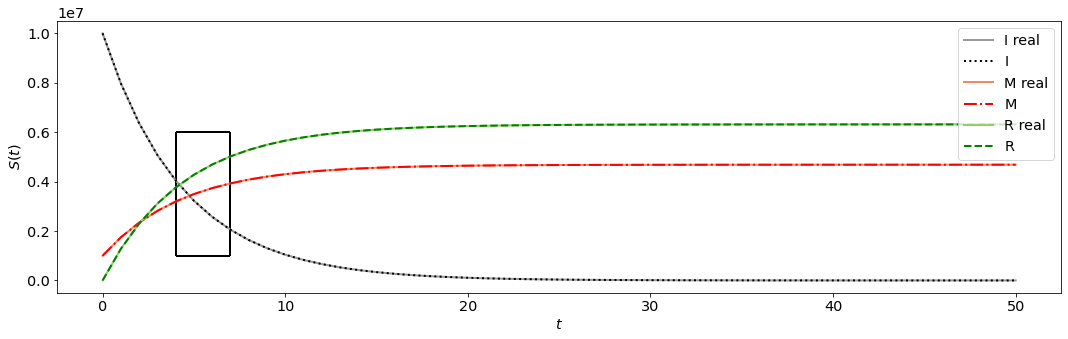

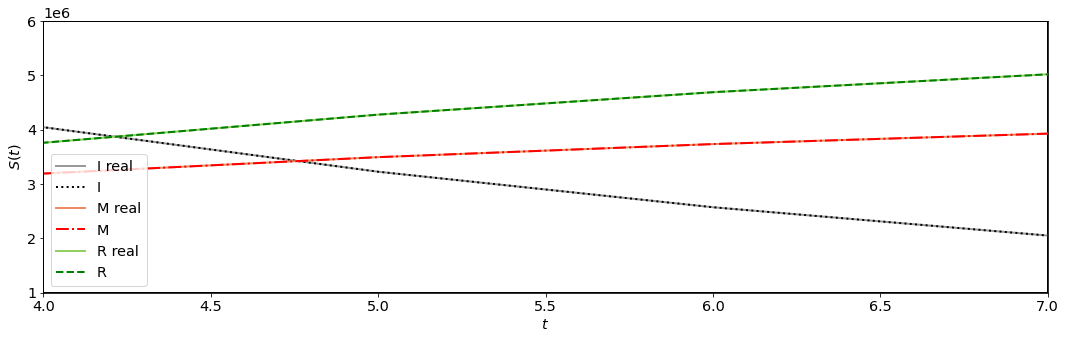

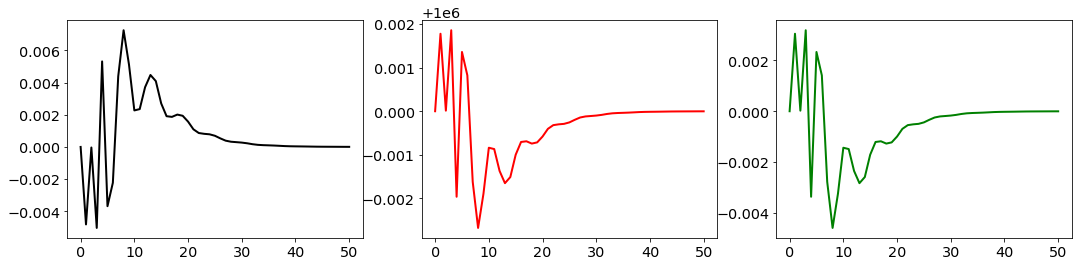

In [111]:
plt.figure(figsize = (18, 5))
plt.subplot(111)
# plt.scatter(sol.t, sol.y[0], c='#999999', s = 100, alpha = 0.7, label = 'I real')
plt.plot(sol.t, sol.y[0], c='#999999', label = 'I real')
plt.plot(sol.t, sol.y[0], c='k', linestyle=':', label="I")

# plt.scatter(sol.t, sol.y[1], c='#ef8a62',s = 100, alpha = 0.7, label='M real')
plt.plot(sol.t, sol.y[1], c='#ef8a62', label="M real")
plt.plot(sol.t, sol.y[1], c='r', linestyle='-.', label="M")

# plt.scatter(sol.t, sol.y[2], c='#91cf60',s = 100, alpha=0.7, label="R real")
plt.plot(sol.t, sol.y[2], c='#91cf60', label="R real")
plt.plot(sol.t, sol.y[2], c='g', linestyle='--', label="R")

plt.hlines(0.1*I0,4,7,linestyles='-',color='k')
plt.hlines(0.6*I0,4,7,linestyles='-',color='k')
plt.vlines(4,0.1*I0,0.6*I0,linestyles='-',color='k')
plt.vlines(7,0.1*I0,0.6*I0,linestyles='-',color='k')

plt.xlabel('$t$')
plt.ylabel('$S(t)$')
plt.legend()
plt.show()
# --*--*--*--*--*--*--*--*
plt.figure(figsize = (18, 5))
plt.subplot(111)
# plt.scatter(sol.t, sol.y[0], c='#999999', s = 100, alpha = 0.7, label = 'I real')
plt.plot(sol.t, sol.y[0], c='#999999', label = 'I real')
plt.plot(sol.t, sol.y[0], c='k', linestyle=':', label="I")

# plt.scatter(sol.t, sol.y[1], c='#ef8a62',s = 100, alpha = 0.7, label='M real')
plt.plot(sol.t, sol.y[1], c='#ef8a62', label="M real")
plt.plot(sol.t, sol.y[1], c='r', linestyle='-.', label="M")

# plt.scatter(sol.t, sol.y[2], c='#91cf60',s = 100, alpha=0.7, label="R real")
plt.plot(sol.t, sol.y[2], c='#91cf60', label="R real")
plt.plot(sol.t, sol.y[2], c='g', linestyle='--', label="R")

plt.hlines(0.1*I0,4,7,linestyles='-',color='k')
plt.hlines(0.6*I0,4,7,linestyles='-',color='k')
plt.vlines(4,0.1*I0,0.6*I0,linestyles='-',color='k')
plt.vlines(7,0.1*I0,0.6*I0,linestyles='-',color='k')

plt.ylim(0.1*I0,0.6*I0)
plt.xlim(4,7)
plt.xlabel('$t$')
plt.ylabel('$S(t)$')
plt.legend()
plt.show()

# --*--*--*--*--*--*--*--*

plt.figure(figsize = (18, 4))
plt.subplot(131)
plt.plot(sol.t, sol.y[0] - sol0(sol.t),  c='k')
plt.subplot(132)
plt.plot(sol.t, sol.y[1] - sol1(sol.t), c='r')
plt.subplot(133)
plt.plot(sol.t, sol.y[2] - sol2(sol.t), c='g')
plt.show()

## Referencias

https://towardsdatascience.com/understanding-logistic-regression-step-by-step-704a78be7e0a